In [1]:
##2.2.1 数据的预处理

表2-1 美国某区域居民基本数据集
1.首先，观察数据集的结构，变量含义，变量类型
2.对数据集进行清洗，删除重复值，删除缺失值，删除异常值

In [9]:
#导入第三方包
import pandas as pd  #这是一个强大的数据处理库，提供了数据结构和处理数据的方法，用于数据分析。
import numpy as np  # type: ignore #这是一个用于数值计算的库，提供了各种数学函数和线性代数功能。
import seaborn as sns # type: ignore #这是一个基于matplotlib的可视化库，提供了更高级的可视化方法，用于数据可视化。


#数据读取
income=pd.read_excel(r'E:\Github\Python_Data_analysis-cleaning\Day 1\income.xlsx')

#查看是否存在缺失值
income.apply(lambda x:np.sum(x.isnull()))

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

缺失值的处理方式：
1.删除法->对于缺失的整一个观测值都要删除，比例小可以，但是比例大会删除有用信息，以及若是连续的数据，删除可能也会有问题

2.替换法->用一个常数去替换缺失值。（1）离散型，用众数;(2)数值型，可以考虑均值或者中位数。

3.插补法->利用未缺失的变量预测确实变量的值，如回归插补法，多重插补法，拉格朗日插补法。

In [3]:
#缺失值处理
#该缺失值的类型都为离散型变量
income.fillna(value={'workclass':income.workclass.mode()[0],
                     'occupation':income.occupation.mode()[0],
                     'native-country':income['native-country'].mode()[0],
},inplace=True)

In [4]:
#查看是否存在缺失值
income.apply(lambda x:np.sum(x.isnull()))

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

##2.2.2 数据的探索性分析
接下来对居民收入数据集进行简单的探索性分析，目的是为了了解数据背后的特征，如数据的集中趋势、离散趋势、数据形状和变量间的关系

基本统计值，如均值，中位数，众数

In [5]:
#数值型变量的统计描述
income.describe()

#个数（count）
#均值（mean）
#标准差（std）
#最小值（min）
#下四分位数(25%)
#中位数（50%）
#上四分位数（75%）
#最大值（max）


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
#离散型变量的统计描述
income.describe(include=['object'])


#个数（count）
#不同离散值的个数(unique)
#出现频次最高的离散值(top)
#出现频次最低的离散值(freq)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


数据的分布形状(如偏度、峰度等)可以通过可视化的方法进行展示，这里仅以被调查居民的年龄和每周工作小时数为例，绘制各自的分布形状图

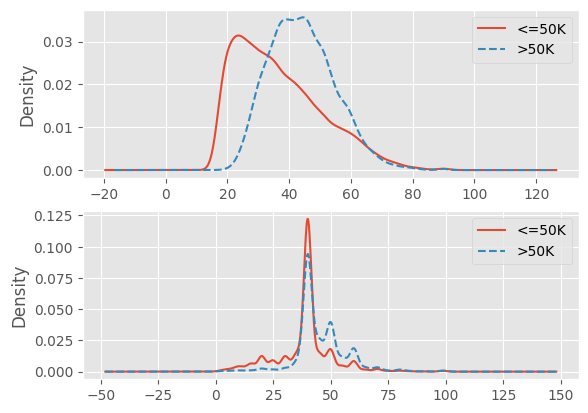

In [14]:
#导入绘图模块
import matplotlib.pyplot as plt 
#设置绘图风格
plt.style.use('ggplot')
#设置多图形的组合
fig,axes=plt.subplots(2,1)
#绘制不同收入水平下的年龄核密度图
income.age[income.income == ' <=50K'].plot(kind='kde',label='<=50K',ax=axes[0],
                                        legend=True,linestyle='-')
income.age[income.income == ' >50K'].plot(kind='kde',label='>50K',ax=axes[0],
                                       legend=True,linestyle='--')

#绘制不同收入水平下的每周工作小时数核密度图
income['hours-per-week'][income.income==' <=50K'].plot(kind='kde',label='<=50K',ax=axes[1],legend=True,linestyle='-')
income['hours-per-week'][income.income==' >50K'].plot(kind='kde',label='>50K',ax=axes[1],legend=True,linestyle='--')
plt.show()



解读：
第一幅图是，在不同的收入水平下，年龄核密度分布图，对于奶奶收入超过5万美金的剧名来说，他们的年龄的几乎呈现正态分布，而收入低于5万美金的居民，年龄呈现右偏的特征，即年龄偏大的居民人数要比年龄偏小的居民人数多。
第二幅图是，在不同的收入水平下，每周工作小时数的核密度分布图，很明显，两者的分布趋势非常相似，并且出现局部峰值。

同时，也可以针对离散型变量，对比居民的收入高低在性别、种族状态、家庭关系等方面的差异，进而可以发现这些离散变量是否影响收入水平

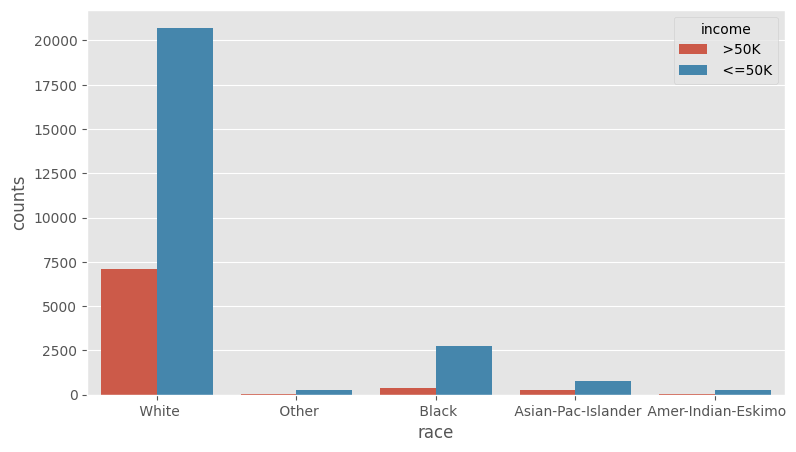

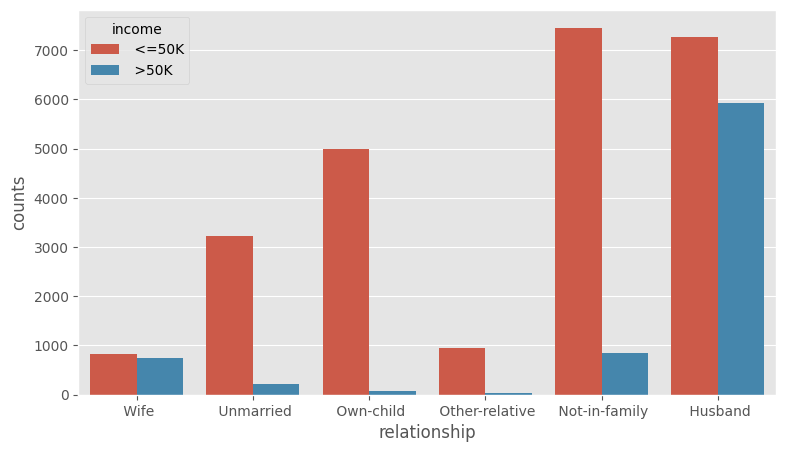

In [15]:
##构造不同收入水平各种族人数的数据
race=pd.DataFrame(income.groupby(by = ['race','income']).aggregate(np.size).loc[:,'age'])
#这段Python代码的作用是按照race和income的组合统计每个组合中age的分布情况，并输出一个DataFrame。
#实现原理：
#使用pandas库的DataFrame对象，通过传递income数据框的groupby()方法，按照'race'和'income'字段进行分组。
#使用aggregate()方法，对分组后的数据进行聚合操作，使用np.size()函数计算每个组中元素的个数。
#使用loc[:,'age']索引，选择'age'字段的数据，并将结果存储在一个新的DataFrame对象中。
#用途： 这个代码片段可以用于分析不同种族和收入水平人群的年龄分布情况。

##重设行索引
race = race.reset_index()

##变量重命名
race.rename(columns={'age':'counts'},inplace=True)

##排序
race.sort_values(by=['race','income'],ascending=False,inplace=True)

##构造不同收入水平下个家庭关系人数的数据
relationship=pd.DataFrame(income.groupby(by = ['relationship','income']).aggregate(np.size).loc[:,'age'])
relationship = relationship.reset_index()
relationship.rename(columns={'age':'counts'},inplace=True)
relationship.sort_values(by=['relationship','counts'],ascending=False,inplace=True)
#这段Python代码的目的是对某个数据集（这里称为`income`）中的人员的年龄分布进行统计分析。
#具体来说，它按照关系（relationship）和收入（income）两个维度进行分组，然后计算每个分组中年龄的分布情况。
#最后，按照关系和计数（counts）的顺序对结果进行排序。
#实现原理如下：
#1. 使用`pd.DataFrame`和`np.size`对`income`数据集按照关系和收入进行分组，并计算每个分组的年龄数量。
#2. 使用`reset_index`方法将结果转换为可序列为列的数据结构。
#3. 使用`rename`方法将计数列重命名为`counts`。
#4. 使用`sort_values`方法按照关系和计数对结果进行排序，并设置升序排序。

##设置图框比例，并绘图
plt.figure(figsize=(9,5))
sns.barplot(x='race',y='counts',hue='income',data=race)
plt.show()

plt.figure(figsize=(9,5))
sns.barplot(x='relationship',y='counts',hue='income',data=relationship)
plt.show()

解读：
上图，反映的是相同的种族下，居民年收入水平高低的人数差异；
下图，反映的是相同的家庭关系下，居民年收入水平高低的人数差异。
但无论怎么比较，都发现一个规律，即在某一个相同的水平下（如白人或未结婚人群中），年收入低于5w美金的人都要比年收入高于5w美金的人多，这个应该是抽样导致的差异（数据集中年收入低于5万和高于5万的居民的居民比例大致在75%；25%）


2.2.3数据建模

1.对离散变量重编码
（其实就是让字符转成0，1，2，3，4。男女转成0，1.季节春夏秋冬转成0，1，2，3，但是在进行回归为了避免线性，一般来说男女是需要表示女或者是男的就行）
前面提到，由于收入数据集中有很多离散型变量，这样的字符变量是不能直接用于建模的，需要对这些变量进行冲编码，关于重编码的方法有很多，如字符型的值转化为整数型的值、哑变量处理（0-1变量）、One-Hot热变量(类似于哑变量)等。

下面将采用“字符转数值”的方法对离散型变量进行冲编码

In [16]:
##离散变量重编码
for feature in income.columns:
    if income[feature].dtype == 'object':
        income[feature] = pd.Categorical(income[feature]).codes
        
income.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


解读：

